In [34]:
import os
import re
import csv
import numpy as np
import pandas as pd
import argparse
import re
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import pybedtools
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import glob

all_files = glob.glob("/Users/mike/english/seg.files" + "/*cna.seg")
filenames=[os.path.basename(x)[0:5] for x in all_files]
dfs=[]
for filename in all_files:
    df = pd.read_table(filename,
                       sep="\t",
                       header=0,
                       index_col=None,
                       names=["chrom","start","stop","cn","event",os.path.basename(filename)[0:5]+"_logr",
                    "subclone","corrected_cn","corrected_call","logr_cn"])

    df = df.set_index(["chrom","start","stop"])
    df = df[os.path.basename(filename)[0:5]+"_logr"]
    dfs += [df]
## cluster on the logr feature

In [46]:
df = pd.concat(dfs,axis=1).reset_index()
df = df[df["chrom"]!="Y"].set_index(["chrom","start","stop"])
df = df.dropna(how="any",axis="rows")

In [47]:
print(df)

                           352J._logr  303J._logr  613G._logr  78J.s_logr  \
chrom start     stop                                                        
1     3100001   3150000       -0.1130      0.0431     -0.1638      0.0889   
      3150001   3200000       -0.2970     -0.0358     -0.1744     -0.0270   
      3200001   3250000        0.0339      0.2594      0.0053      0.1098   
      3250001   3300000       -0.2901      0.0195     -0.0042     -0.1365   
      3300001   3350000       -0.5111     -0.3605     -0.2618     -0.0943   
...                               ...         ...         ...         ...   
X     169650001 169700000      0.1671      0.4494      0.1691      0.0476   
      169750001 169800000      0.1749      0.4847      0.3811      0.0030   
      169800001 169850000      0.6299      0.0838      0.4027      0.3718   
      169850001 169900000      0.3282      0.4397      0.1068      0.0897   
      169900001 169950000      0.5418      0.4950      0.4793      0.3288   

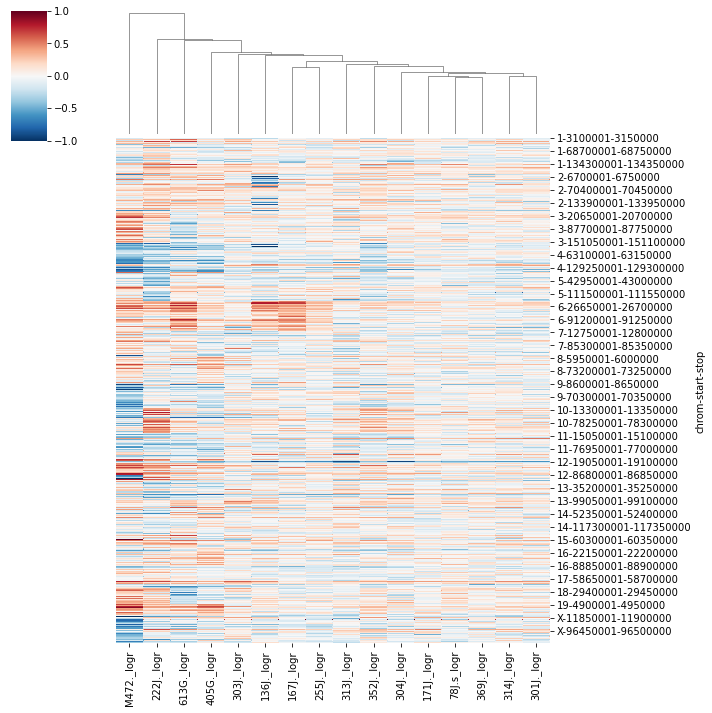

In [49]:
sns.clustermap(df,row_cluster=False,cmap="RdBu_r",vmin=-1,vmax=1)